In [3]:
import pandas as pd
import numpy as np
from sklearn import model_selection, linear_model, metrics, datasets, feature_selection
from sklearn.preprocessing import LabelEncoder
#from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
suicide = pd.read_csv('data/master.csv')

In [5]:
suicide.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


#heart = pd.read_csv('data/heart.csv')


In [6]:
#independent columns

included_col = ['country',
 'year',
 'sex',
 'age',
 'population',
 'suicides/100k pop',
 'gdp_per_capita ($)',
 'generation']

In [7]:
suicide = suicide[included_col]

In [8]:
suicide['suicides/100k pop'].quantile([0, .005, .01, .02, .03, .04, .1, .12, .14, .15, .16, .18, .2])

0.000    0.00
0.005    0.00
0.010    0.00
0.020    0.00
0.030    0.00
0.040    0.00
0.100    0.00
0.120    0.00
0.140    0.00
0.150    0.00
0.160    0.13
0.180    0.29
0.200    0.41
Name: suicides/100k pop, dtype: float64

In [9]:
suicide['suicides/100k pop'].quantile([0.9, .91, .92, .93, .94, .95, .96, .97, .98, .99, 1])

0.90     33.2910
0.91     35.4158
0.92     38.1648
0.93     41.1934
0.94     44.9500
0.95     50.5305
0.96     57.0500
0.97     66.2658
0.98     77.7548
0.99     91.5710
1.00    224.9700
Name: suicides/100k pop, dtype: float64

In [10]:
suicide_cleaned = suicide[(suicide['suicides/100k pop'] < 100)  & (suicide['suicides/100k pop'] > 0.1)]

In [11]:
suicide_cleaned['generation'].unique()

array(['Generation X', 'Silent', 'G.I. Generation', 'Boomers',
       'Millenials', 'Generation Z'], dtype=object)

#total suicide rates during 1985 - 2016 of nations. We find the highest and lowest suicide 
rate. Canda's standing is compared with the highest and lowest.

In [12]:
country_suicide = suicide_cleaned[['country', 'suicides/100k pop']].groupby('country').agg(sum)
country_entries = suicide_cleaned[['country', 'suicides/100k pop']].groupby('country').agg(len)
country_entries.columns = ['entry number']
country_suicide_joined = pd.merge(country_suicide, country_entries, how='right', on = 'country')
country_suicide_joined['average suicide'] = country_suicide_joined['suicides/100k pop']/country_suicide_joined['entry number']
country_suicide_joined['order'] = range(len(country_suicide_joined))

In [44]:
country_suicide_joined.head(10)

,suicides/100k pop,entry number,average suicide,order
country,,,,
Albania,924.76,206.0,4.489126,0
Antigua and Barbuda,179.14,10.0,17.914000,1
Argentina,3894.59,372.0,10.469328,2
Armenia,976.21,252.0,3.873849,3
Aruba,1137.02,49.0,23.204490,4
Australia,4676.77,349.0,13.400487,5
Austria,7660.98,361.0,21.221551,6
Azerbaijan,356.24,165.0,2.159030,7
Bahamas,344.28,65.0,5.296615,8


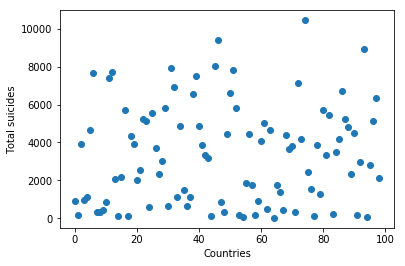

In [14]:
plt.scatter(country_suicide_joined['order'], country_suicide_joined['suicides/100k pop'])

plt.xlabel('Countries')
plt.ylabel('Total suicides')
plt.show()
           

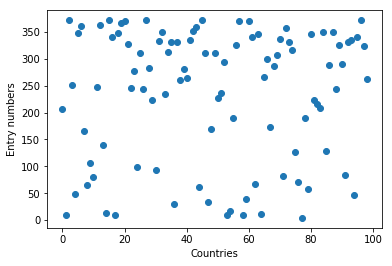

In [15]:
plt.scatter(country_suicide_joined['order'], country_suicide_joined['entry number'])
plt.xlabel('Countries')
plt.ylabel('Entry numbers')
plt.show()

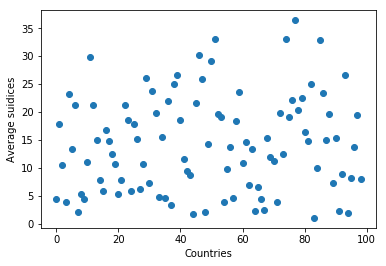

In [16]:
plt.scatter(country_suicide_joined['order'], country_suicide_joined['average suicide'])
plt.xlabel('Countries')
plt.ylabel('Average suidices')
plt.show()


In [17]:
country_suicide_joined[country_suicide_joined['average suicide'] == max(country_suicide_joined[country_suicide_joined['entry number'] > 200]['average suicide'])]


,suicides/100k pop,entry number,average suicide,order
country,,,,
Lithuania,7801.39,236.0,33.056737,51


In [18]:
x_canada, y_canada = country_suicide_joined.loc['Canada']['order'], country_suicide_joined.loc['Canada']['average suicide']
x_sa, y_sa = country_suicide_joined.loc['South Africa']['order'], country_suicide_joined.loc['South Africa']['average suicide']
x_sm, y_sm = country_suicide_joined.loc['San Marino']['order'], country_suicide_joined.loc['San Marino']['average suicide']
x_lith, y_lith = country_suicide_joined.loc['Lithuania']['order'], country_suicide_joined.loc['Lithuania']['average suicide']


In [19]:
country_suicide_joined.loc['South Africa']

suicides/100k pop    229.910000
entry number         209.000000
average suicide        1.100048
order                 83.000000
Name: South Africa, dtype: float64

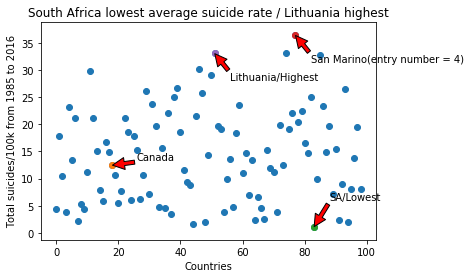

In [20]:
plt.scatter(country_suicide_joined['order'], country_suicide_joined['average suicide'])
plt.scatter(x_canada, y_canada)
plt.scatter(x_sa, y_sa)
plt.scatter(x_sm, y_sm)
plt.scatter(x_lith, y_lith)
plt.xlabel('Countries')
plt.ylabel('Total suicides/100k from 1985 to 2016')

plt.annotate('Canada', xy=(x_canada, y_canada), 
             xytext=(x_canada+8, y_canada+1),
             arrowprops=dict(facecolor='red', shrink=0.015,), 
             )
plt.annotate('SA/Lowest', xy=(x_sa, y_sa), xytext=(x_sa+5, y_sa+5),
             arrowprops=dict(facecolor='red', shrink=0.015,), 
             )
plt.annotate('Lithuania/Highest', xy=(x_lith, y_lith), xytext=(x_lith+5, y_lith-5),
             arrowprops=dict(facecolor='red', shrink=0.015,), 
             )
plt.annotate('San Marino(entry number = 4)', xy=(x_sm, y_sm), xytext=(x_sm+5, y_sm-5),
             arrowprops=dict(facecolor='red', shrink=0.015,), 
             )
plt.title('South Africa lowest average suicide rate / Lithuania highest')
plt.show()

In [21]:
suicide_lith = suicide_cleaned[suicide_cleaned['country'] == 'Lithuania']
suicide_canada = suicide_cleaned[suicide_cleaned['country'] == 'Canada']
suicide_sa = suicide_cleaned[suicide_cleaned['country'] == 'South Africa']

In [22]:
canada_male = suicide_canada[suicide_canada['sex'] == 'male']
x_male = canada_male.groupby('year').agg(sum).index.values.reshape(-1,1)
y_male = canada_male.groupby('year').agg(sum)['suicides/100k pop']

In [23]:
regr = linear_model.LinearRegression()
regr.fit(x_male, y_male)
y_male_pred = regr.predict(x_male)

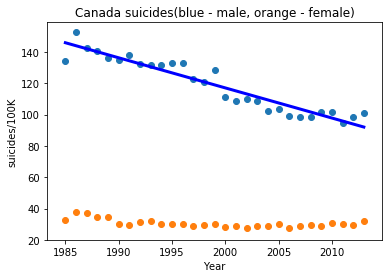

In [24]:
canada_female = suicide_canada[suicide_canada['sex'] == 'female']
x_female = canada_female.groupby('year').agg(sum).index
y_female = canada_female.groupby('year').agg(sum)['suicides/100k pop']
plt.scatter(x_male, y_male)
plt.plot(x_male, y_male_pred, color='blue', linewidth=3)
plt.scatter(x_female, y_female)
plt.xlabel('Year')
plt.ylabel('suicides/100K')
plt.title('Canada suicides(blue - male, orange - female)')
plt.show()


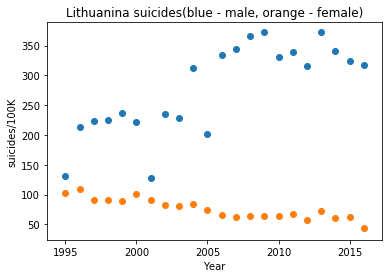

In [25]:
lith_male = suicide_lith[suicide_lith['sex'] == 'male']
x_male = lith_male.groupby('year').agg(sum).index.values.reshape(-1,1)
y_male = lith_male.groupby('year').agg(sum)['suicides/100k pop']
lith_female = suicide_lith[suicide_lith['sex'] == 'female']
x_female = lith_female.groupby('year').agg(sum).index.values.reshape(-1,1)
y_female = lith_female.groupby('year').agg(sum)['suicides/100k pop']
plt.scatter(x_male, y_male)
plt.scatter(x_female, y_female)
plt.xlabel('Year')
plt.ylabel('suicides/100K')
plt.title('Lithuanina suicides(blue - male, orange - female)')
plt.show()

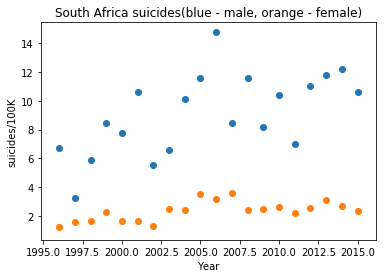

In [26]:
sa_male = suicide_sa[suicide_sa['sex'] == 'male']
x_male = sa_male.groupby('year').agg(sum).index.values.reshape(-1,1)
y_male = sa_male.groupby('year').agg(sum)['suicides/100k pop']
sa_female = suicide_sa[suicide_sa['sex'] == 'female']
x_female = sa_female.groupby('year').agg(sum).index.values.reshape(-1,1)
y_female = sa_female.groupby('year').agg(sum)['suicides/100k pop']
plt.scatter(x_male, y_male)
plt.scatter(x_female, y_female)
plt.xlabel('Year')
plt.ylabel('suicides/100K')
plt.title('South Africa suicides(blue - male, orange - female)')
plt.show()

In [27]:
suicide_dummies = pd.get_dummies(suicide_cleaned, columns=['age', 'sex', 'generation'])

In [28]:
from collections import defaultdict
dd = defaultdict(LabelEncoder)
encoded_suicide = suicide_cleaned[['country', 'year']].apply(lambda x: dd[x.name].fit_transform(x))
suicide_dummies[['country', 'year']] = encoded_suicide[['country', 'year']]


In [29]:
suicide_dummies.head()

,country,year,population,suicides/100k pop,gdp_per_capita ($),age_15-24 years,age_25-34 years,age_35-54 years,age_5-14 years,age_55-74 years,age_75+ years,sex_female,sex_male,generation_Boomers,generation_G.I. Generation,generation_Generation X,generation_Generation Z,generation_Millenials,generation_Silent
0,0,2,312900,6.71,796,1,0,0,0,0,0,0,1,0,0,1,0,0,0
1,0,2,308000,5.19,796,0,0,1,0,0,0,0,1,0,0,0,0,0,1
2,0,2,289700,4.83,796,1,0,0,0,0,0,1,0,0,0,1,0,0,0
3,0,2,21800,4.59,796,0,0,0,0,0,1,0,1,0,1,0,0,0,0
4,0,2,274300,3.28,796,0,1,0,0,0,0,0,1,1,0,0,0,0,0


In [30]:
factors = ['country',
 'year',
 'population',
 'gdp_per_capita ($)',
 'age_15-24 years',
 'age_25-34 years',
 'age_35-54 years',
 'age_5-14 years',
 'age_55-74 years',
 'age_75+ years',
 'sex_female',
 'sex_male',
 'generation_Boomers',
 'generation_G.I. Generation',
 'generation_Generation X',
 'generation_Generation Z',
 'generation_Millenials',
 'generation_Silent']

In [31]:
regr = linear_model.LinearRegression()
X = suicide_dummies[factors]
y = suicide_dummies['suicides/100k pop']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.4, random_state=0)
regr.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [32]:
regr.score(X_train, y_train)

0.3659806365465268

In [33]:
regr.score(X_test, y_test)

0.358865710340907

In [42]:
pd.DataFrame(list(zip(factors, np.transpose(regr.coef_)))).sort_values(by=0)

,0,1
4,age_15-24 years,-4.428621e+00
5,age_25-34 years,-9.931571e-01
6,age_35-54 years,2.136045e+00
7,age_5-14 years,-1.415947e+01
8,age_55-74 years,4.727595e+00
9,age_75+ years,1.271761e+01
0,country,2.188662e-02
3,gdp_per_capita ($),8.954595e-06
12,generation_Boomers,-5.910942e-01
13,generation_G.I. Generation,-2.264477e-01


In [35]:
y_predict = regr.predict(X)
suicide_com = suicide_cleaned.join(pd.DataFrame(y_predict))
suicide_com.columns = [           'country',               'year',                'sex',
                      'age',         'population',  'suicides/100k pop',
       'gdp_per_capita ($)',         'generation',                    'suicides predicted']

In [36]:
suicide_com = suicide_com[['country', 'year', 'sex','age', 'population','gdp_per_capita ($)',
                           'generation', 'suicides/100k pop','suicides predicted']]

In [37]:
suicide_com.head()

,country,year,sex,age,population,gdp_per_capita ($),generation,suicides/100k pop,suicides predicted
0,Albania,1987,male,15-24 years,312900,796,Generation X,6.71,17.480500
1,Albania,1987,male,35-54 years,308000,796,Silent,5.19,22.636942
2,Albania,1987,female,15-24 years,289700,796,Generation X,4.83,2.633114
3,Albania,1987,male,75+ years,21800,796,G.I. Generation,4.59,34.166232
4,Albania,1987,male,25-34 years,274300,796,Boomers,3.28,20.098413


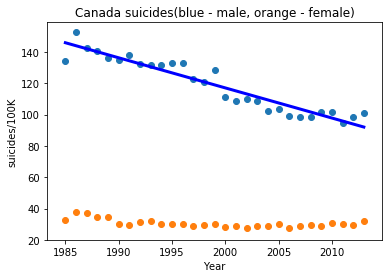

In [38]:
canada_male = suicide_canada[suicide_canada['sex'] == 'male']
x_male = canada_male.groupby('year').agg(sum).index.values.reshape(-1,1)
y_male = canada_male.groupby('year').agg(sum)['suicides/100k pop']
canada_female = suicide_canada[suicide_canada['sex'] == 'female']
x_female = canada_female.groupby('year').agg(sum).index
y_female = canada_female.groupby('year').agg(sum)['suicides/100k pop']
plt.scatter(x_male, y_male)
plt.plot(x_male, y_male_pred, color='blue', linewidth=3)
plt.scatter(x_female, y_female)
plt.xlabel('Year')
plt.ylabel('suicides/100K')
plt.title('Canada suicides(blue - male, orange - female)')
plt.show()

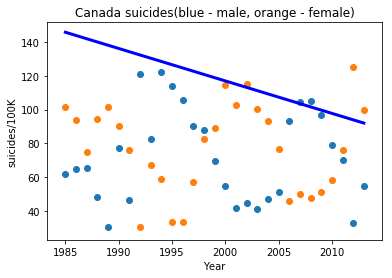

In [39]:
suicide_canada = suicide_com[suicide_cleaned['country'] == 'Canada']
canada_male = suicide_canada[suicide_canada['sex'] == 'male']
x_male = canada_male.groupby('year').agg(sum).index.values.reshape(-1,1)
y_male = canada_male.groupby('year').agg(sum)['suicides predicted']
canada_female = suicide_canada[suicide_canada['sex'] == 'female']
x_female = canada_female.groupby('year').agg(sum).index
y_female = canada_female.groupby('year').agg(sum)['suicides predicted']
plt.scatter(x_male, y_male)
plt.plot(x_male, y_male_pred, color='blue', linewidth=3)
plt.scatter(x_female, y_female)
plt.xlabel('Year')
plt.ylabel('suicides/100K')
plt.title('Canada suicides(blue - male, orange - female)')
plt.show()

In [40]:
suicide_com[suicide_cleaned['country'] == 'Canada'].loc[4921: 4925]

,country,year,sex,age,population,gdp_per_capita ($),generation,suicides/100k pop,suicides predicted
4921,Canada,1985,female,35-54 years,3025600,15522,Silent,8.43,7.469427
4922,Canada,1985,female,55-74 years,2092200,15522,G.I. Generation,7.93,-7.377709
4923,Canada,1985,female,25-34 years,2257500,15522,Boomers,6.56,33.662227
4924,Canada,1985,female,75+ years,642900,15522,G.I. Generation,5.29,24.725393
4925,Canada,1985,female,15-24 years,2143200,15522,Generation X,3.97,22.731526


In [43]:

#suicide_com[suicide_cleaned['country'] == 'United States'].head()